# Data Collection Playground
### Pipeline for data collection from spotify api. Collects song metadata and mp3s.

In [2]:
# Default imports
import math
import string
import json
import pandas as pd

In [3]:
#Import and initiate spotify credentials
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials('23f5b5ae10874e0d9db993f3e9d532ec','68407a217ae24d57b888c4e1ba6a2f29')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


In [5]:
# Machine Learning import (turn on later)
from sklearn.cluster import KMeans
import numpy as np
#import keras

In [6]:
def get_user_playlists(username='ritwikbiswas'):
    '''
    Collect top songs from top playlists of a given user
    '''
    playlists = sp.user_playlists(username,limit=10)
    # for i, playlist in enumerate(playlists['items']):
    #     print(playlist)
    results = sp.user_playlist(username, playlists['items'][3]['id'],fields='tracks')
    # tracks = json.loads(results)
    #load tracks
    count = 0
    for tracks in results['tracks']['items']:
        print(tracks['track']['name'])
        print(tracks['track']['artists'][0]['name'])
        print(tracks['track']['id'])
        print("")
        count += 1
        if count == 10:
            break
        # for i in tracks:
        #     print(i)
        #     print(tracks[i])

In [7]:
get_user_playlists()

Let Me Hold You (Turn Me On)
Cheat Codes
72xvRETEsd5hS1RfduciRi

Silence ft. Dave Thomas Junior
Don Diablo
3yIQcwR3yRfYsnXotEJeJ1

Spaceships
AREA21
7Ktv8bQUjZt0rr16qgB4h2

Dive
Salvatore Ganacci
0drpjw4Z1WN4wSJc3o6fZk

Breathe
Seeb
6s5smacBOoWoI08Vi6EX5T

Sex
Cheat Codes
5ZEM9j0jrFr5RdHEbl2MYV

This Is What You Came For
Calvin Harris
0azC730Exh71aQlOt9Zj3y

Speechless (feat. RKCB)
Candyland
0TMWGCBG1KdnEGwQhagp3t

Spaceship
Comet Blue
3ugmizSA071BoGL7jzd272

Candyman
Zedd
0NWQTyapmz4GuDTSN9xTB7



### Dataflow object that will handle full playlist processing and metadata extraction

In [8]:
class DataFlow:
    '''
    Class to collect and manage raw data from spotify api
    '''
    def __init__(self, data_path='raw_data/'):
        ''' Initialize internal processing variables '''
        self.data_path = data_path
        self.tracks_processed = 0
        self.playlists_processed = 0
        columns = ["title","artist","track_id","playlist_id","duration","mode","time_sig","danceability","energy","instrumental","liveness","loudness","speechiness","valence","tempo","acousticness","mp3_path"]
        self.df = pd.DataFrame(columns=columns) #create columns for each metadata piece, title, artist, playlist id, mp3 path

    def process_uri(self,raw_uri):
        '''
        Simple spotify playlist uri processing
        '''
        #uri = 'spotify:user:spotifycharts:playlist:37i9dQZEVXbJiZcmkrIHGU'
        break_down = raw_uri.split(':')
        return break_down[len(break_down)-1]
    
    def process_track(self, track_id, title, artist, playlist_id):
        ''' Extracts audio metadata from track '''
        
        new_id = 'spotify:track:' + track_id
        track = sp.audio_features(new_id)[0]
        #print(track)
        
        #construct row for db
        row = [title, artist, track_id, playlist_id, track['duration_ms'],track['mode'],track['time_signature'],track['danceability'],track['energy'],track['instrumentalness'],track['liveness'],track['loudness'],track['speechiness'],track['valence'],track['tempo'],track['acousticness'],'']
        self.df.loc[len(self.df)] = row
        self.tracks_processed += 1
        print( "[" + str(self.tracks_processed) + "] Processed " + title + " by " +artist)
        #print("\n")
        
    def process_playlist(self,playlist_uri='spotify:playlist:37i9dQZF1DX1gRalH1mWrP'):
        '''
        Given a playlist, collects all data for songs in playlist
        '''
        playlist_id = self.process_uri(playlist_uri)
        results = sp.user_playlist('ritwikbiswas', playlist_id)
        #raw = json.dumps(results, indent=4)
        #print(raw)
        raw = results['tracks']['items']
        #Iterate through each track and push to panda df
        for track in raw:
            try:
                self.process_track(track['track']['id'],track['track']['name'],track['track']['artists'][0]['name'],playlist_id)
            except:
                pass
        self.playlists_processed += 1
        
    def process_all(self,playlists_file_path=''):
        '''
        Process and collect data from multiple playlists specified in a file
        '''
        pass

### Process a few of my playlists to collect metadata

In [9]:
d_f = DataFlow()
d_f.process_playlist('spotify:playlist:1iymzghI6ppqvcgU6iTE95') # Certified Bangers
d_f.process_playlist('spotify:playlist:2EKqDlT6erB3ZDI83bHsnJ') # LT_8
d_f.process_playlist('spotify:playlist:7E5uI67fMwywFV5N1QgoPn') # LT_9
d_f.process_playlist('spotify:playlist:0Vhm8Y9kS36xfcJuELbA0J') # LT_10
d_f.process_playlist('spotify:playlist:1n4nHfHfvqUd6zod1V2cJf') # LT_11


[1] Processed I Love It by Cheat Codes
[2] Processed Taste (feat. Offset) by Tyga
[3] Processed I Just Can't by R3HAB
[4] Processed Nonstop by Drake
[5] Processed Growing Pains - Justin Caruso Remix by Alessia Cara
[6] Processed FEFE (feat. Nicki Minaj & Murda Beatz) by 6ix9ine
[7] Processed Can't Resist by Halogen
[8] Processed SICKO MODE by Travis Scott
[9] Processed Praying - Frank Walker Remix by Kesha
[10] Processed All Mine by Kanye West
[11] Processed Stay Open by Diplo
[12] Processed Walk It Talk It by Migos
[13] Processed Ode 2 Bae by ARME
[14] Processed Yes Indeed by Lil Baby
[15] Processed Solo (feat. Demi Lovato) - Wideboys Remix by Clean Bandit
[16] Processed Esskeetit by Lil Pump
[17] Processed Jackie Chan by Tiësto
[18] Processed Do Not Disturb by Smokepurpp
[19] Processed Feels Great (feat. Fetty Wap & CVBZ) - Party Pupils Remix by Cheat Codes
[20] Processed Talk Up (feat. Jay-Z) by Drake
[21] Processed Fire Away by Prince Paris
[22] Processed Color Blind by Diplo
[23] 

[164] Processed Chasing Tail (Madnap Remix) by Win and Woo
[165] Processed Make Me Believe by Julian Calor
[166] Processed Running Away by Tim Gunter
[167] Processed Gold by Ricky Remedy
[168] Processed Calling by Jayli
[169] Processed Why Don’t You Come On (ft. Khalid and Empress Of) by DJDS
[170] Processed Too Soon - Snareskin Remix by Vanic
[171] Processed Before U Go by BAZZ
[172] Processed Ode 2 Bae by ARME
[173] Processed Upsidedown by Shaun Frank
[174] Processed Lucid Dreams by Juice WRLD
[175] Processed Stay Open by Diplo
[176] Processed I Love It by Cheat Codes
[177] Processed Back To You by Selena Gomez
[178] Processed 4th Dimension by KIDS SEE GHOSTS
[179] Processed Taste (feat. Offset) by Tyga
[180] Processed I Wonder by The Him
[181] Processed Arty Boy - Manila Killa Remix by Flight Facilities
[182] Processed LOVE. by Xie
[183] Processed Restless Sea by Louis Futon
[184] Processed Lessons (Tarro Remix) by Naomi Wild
[185] Processed Sweeter Without You by Borgeous
[186] Pro

[340] Processed Crew (feat. Brent Faiyaz & Shy Glizzy) - Lido Remix by GoldLink
[341] Processed Pretty Stranger by Prismo
[342] Processed Game Plan (Jorgen Odegard Remix) [feat. Jon Bellion] by Ojivolta
[343] Processed I Just Wanna Know by 2Scratch
[344] Processed I Want You (feat. Matthew John Kurz) by Robotaki
[345] Processed Go Flex (Remix) by Yardhaus
[346] Processed Cancel on You by Arman Cekin
[347] Processed Middle Finger by Phoebe Ryan
[348] Processed Better (Jimmie Remix) by Jimmie
[349] Processed Missing You by CAZZETTE
[350] Processed Homebound by DROELOE
[351] Processed Wake Up in the Sky by Gucci Mane
[352] Processed Where Would We Be by ROZES
[353] Processed This Feeling (feat. Kelsea Ballerini) by The Chainsmokers
[354] Processed Somebody by The Chainsmokers
[355] Processed show me by San Holo
[356] Processed go back in time by San Holo
[357] Processed voices in my head by San Holo
[358] Processed worthy by San Holo
[359] Processed surface by San Holo
[360] Processed lif

In [39]:
d_f.df.tail()

,title,artist,track_id,playlist_id,duration,mode,time_sig,danceability,energy,instrumental,liveness,loudness,speechiness,valence,tempo,acousticness,mp3_path
483,Good Love (feat. Ericalisa),Kiba,4N1xnnBLhcQx575Mrw8How,1n4nHfHfvqUd6zod1V2cJf,243790,1,4,0.615,0.659,0.0169,0.0698,-7.518,0.0463,0.763,159.963,0.0494,
484,A Little Longer,Instatic,4UCtK14P7WISObypJFJD8s,1n4nHfHfvqUd6zod1V2cJf,187038,0,4,0.595,0.723,1.15e-06,0.3010,-4.866,0.1290,0.557,125.883,0.0522,
485,L.I.F.E. - I.GOT.U Remix,Remady,28ZtEWmjWSeDlz750vdCIf,1n4nHfHfvqUd6zod1V2cJf,249231,1,4,0.591,0.772,9.79e-06,0.1360,-5.569,0.0368,0.224,90.921,0.1740,
486,THE SHIT,GOLDHOUSE,14gdcYmHyORy3ZnvLwZzRV,1n4nHfHfvqUd6zod1V2cJf,196125,1,4,0.652,0.700,0,0.1910,-6.854,0.1030,0.744,160.055,0.1740,
487,Sleep Alone (feat. Ella Boh),Max Styler,7uGtN1U8xuycWLEBHlwNDz,1n4nHfHfvqUd6zod1V2cJf,182069,0,4,0.551,0.525,0,0.0368,-5.912,0.3090,0.337,173.804,0.2740,


In [65]:
# Generate raw track metadata
track_metadata_raw = []
count=0
for index, row in d_f.df.iterrows():
    track_data = [row['mode'], row['time_sig'], row['danceability'], row['energy'], row['instrumental'], row['liveness'], row['loudness'], row['speechiness'], row['valence'], row['tempo'], row['acousticness']]
    count += 1
    track_metadata_raw.append(track_data)
        
#temp = d_f.df['mode',"time_sig"]
#track_metadata_raw = temp.reset_index().values.tolist()
#track_metadata_raw = d_f.df.reset_index()["mode","duration"].values.tolist()#,"mode","time_sig","danceability","energy","instrumental","liveness","loudness","speechiness","valence","tempo","acousticness"].tolist()
#track_metadata_raw = d_f.df["duration","mode","time_sig","danceability","energy","instrumental","liveness","loudness","speechiness","valence","tempo","acousticness"].tolist()

In [66]:
print(track_metadata_raw[:10])
print(len(track_metadata_raw))

[[1, 4, 0.604, 0.748, 0, 0.083, -5.343, 0.0849, 0.52, 120.178, 0.0021], [1, 4, 0.884, 0.559, 0, 0.101, -7.442, 0.12, 0.342, 97.994, 0.0236], [0, 4, 0.652, 0.595, 0, 0.148, -6.944, 0.0419, 0.303, 77.538, 0.162], [0, 4, 0.909, 0.405, 0.00698, 0.105, -8.133, 0.14, 0.455, 154.984, 0.0306], [0, 4, 0.72, 0.823, 1.73e-05, 0.0893, -5.68, 0.212, 0.816, 119.918, 0.0466], [1, 4, 0.931, 0.387, 0, 0.136, -9.127, 0.412, 0.376, 125.978, 0.088], [0, 3, 0.734, 0.913, 0, 0.286, -2.904, 0.0449, 0.376, 124.964, 0.00527], [1, 4, 0.834, 0.73, 0, 0.124, -3.714, 0.222, 0.446, 155.008, 0.00513], [0, 4, 0.534, 0.84, 8.97e-06, 0.197, -4.535, 0.463, 0.278, 159.97, 0.019], [0, 4, 0.925, 0.308, 0, 0.0933, -6.562, 0.338, 0.265, 122.099, 0.125]]
488


### KMeans Time 🔥

In [68]:
track_metadata = np.array(track_metadata_raw)
track_metadata[:5]

array([[ 1.00000e+00,  4.00000e+00,  6.04000e-01,  7.48000e-01,
         0.00000e+00,  8.30000e-02, -5.34300e+00,  8.49000e-02,
         5.20000e-01,  1.20178e+02,  2.10000e-03],
       [ 1.00000e+00,  4.00000e+00,  8.84000e-01,  5.59000e-01,
         0.00000e+00,  1.01000e-01, -7.44200e+00,  1.20000e-01,
         3.42000e-01,  9.79940e+01,  2.36000e-02],
       [ 0.00000e+00,  4.00000e+00,  6.52000e-01,  5.95000e-01,
         0.00000e+00,  1.48000e-01, -6.94400e+00,  4.19000e-02,
         3.03000e-01,  7.75380e+01,  1.62000e-01],
       [ 0.00000e+00,  4.00000e+00,  9.09000e-01,  4.05000e-01,
         6.98000e-03,  1.05000e-01, -8.13300e+00,  1.40000e-01,
         4.55000e-01,  1.54984e+02,  3.06000e-02],
       [ 0.00000e+00,  4.00000e+00,  7.20000e-01,  8.23000e-01,
         1.73000e-05,  8.93000e-02, -5.68000e+00,  2.12000e-01,
         8.16000e-01,  1.19918e+02,  4.66000e-02]])

In [71]:
kmeans_tracks = KMeans(n_clusters=4, random_state=0).fit(track_metadata)
print(kmeans_tracks.labels_[:5])

# kmeans_tracks.predict([[0, 0], [12, 3]])

# kmeans_tracks.cluster_centers_

[2 1 3 0 2]


In [72]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(track_metadata)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc_1', 'pc_2','pc_3'])

In [73]:
principalDf.head()

,pc_1,pc_2,pc_3
0,-1.835775,-0.554564,0.553936
1,-24.034084,1.400170,0.497242
2,-44.484340,0.750413,-0.528873
3,32.951244,2.489046,-0.411945
4,-2.096257,-0.234249,-0.437883


### Check out some plots

In [74]:
principalDF_list = principalDf.values.tolist()

In [77]:
print(principalDF_list[:5])
print(len(principalDF_list))

[[-1.8357750494349463, -0.5545639831423469, 0.553935598142388], [-24.03408387918406, 1.4001702279018717, 0.49724227697595025], [-44.48434013978458, 0.750412564503284, -0.5288734558177653], [32.951243522129495, 2.4890457591742057, -0.4119447505334507], [-2.0962571400713426, -0.23424860443939918, -0.43788272859496485]]
488


In [76]:
kmeans_pca_tracks = KMeans(n_clusters=4, random_state=0).fit(principalDF_list)
print(kmeans_tracks.labels_[:5])

# kmeans_tracks.predict([[0, 0], [12, 3]])

# kmeans_tracks.cluster_centers_

[2 1 3 0 2]


In [79]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

Matplotlib is building the font cache using fc-list. This may take a moment.


In [86]:
%matplotlib notebook

<IPython.core.display.Javascript object>


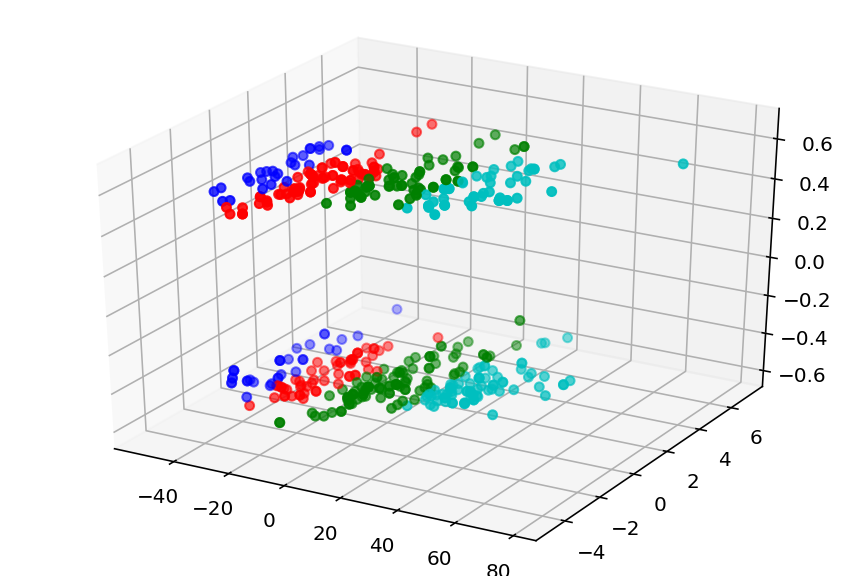

ValueError: too many values to unpack (expected 2)

In [99]:
fig = pyplot.figure()
ax = Axes3D(fig)

pc1 = []
pc2 = []
pc3 = []
color_list = []
for i in range(0,len(principalDF_list)):
    pc1.append(principalDF_list[i][0])
    pc2.append(principalDF_list[i][1])
    pc3.append(principalDF_list[i][2])
    if kmeans_tracks.labels_[i] == 1:
        color_list.append('r')
    elif kmeans_tracks.labels_[i] == 2:
        color_list.append('g')
    elif kmeans_tracks.labels_[i] == 3:
        color_list.append('b')
    else:
        color_list.append('c')

ax.scatter(pc1, pc2, pc3, color=color_list)
ax.annotate("test", (0,0,0))
pyplot.show()